# Finding All QRE Branches Using Continuation Method

This notebook demonstrates how to find ALL quantal response equilibria for a given lambda value, not just the principal branch.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pygambit as gbt
import sys
import os

# Add the parent directory to the path to import from src
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.insert(0, parent_dir)

# Now import from src
from src.qre.continuation import QREContinuation
from src.qre.nash import find_nash_with_pygambit, verify_nash_equilibrium

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

## Define the Game

We'll use the same 3x3 symmetric game from the example notebook.

In [2]:
# Define the payoff matrix
payoff_matrix = np.array([
    [5, 3, 1],
    [2, 6, 0],
    [4, 3, 5]
])

print("Payoff matrix:")
print(payoff_matrix)

Payoff matrix:
[[5 3 1]
 [2 6 0]
 [4 3 5]]


## Find All Nash Equilibria

First, let's find all Nash equilibria of this game. These will be the endpoints of QRE branches as λ → ∞.

# Find Nash equilibria using pygambit
print("Finding Nash equilibria using pygambit...")
nash_equilibria = find_nash_with_pygambit(payoff_matrix)

print(f"Found {len(nash_equilibria)} Nash equilibria:\n")
for i, nash in enumerate(nash_equilibria):
    print(f"Nash {i+1}: [{nash[0]:.4f}, {nash[1]:.4f}, {nash[2]:.4f}]")
    
    # Verify it's a Nash equilibrium
    u = payoff_matrix @ nash
    print(f"  Expected payoffs: [{u[0]:.4f}, {u[1]:.4f}, {u[2]:.4f}]")
    print(f"  Best response payoff: {np.max(u):.4f}")
    print(f"  Verified as Nash: {verify_nash_equilibrium(payoff_matrix, nash)}")
    print()

In [ ]:
# Find Nash equilibria using pygambit
nash_equilibria = find_nash_with_pygambit(payoff_matrix)

print(f"Found {len(nash_equilibria)} Nash equilibria:\n")
for i, nash in enumerate(nash_equilibria):
    print(f"Nash {i+1}: [{nash[0]:.4f}, {nash[1]:.4f}, {nash[2]:.4f}]")
    
    # Verify it's a Nash equilibrium
    u = payoff_matrix @ nash
    print(f"  Expected payoffs: [{u[0]:.4f}, {u[1]:.4f}, {u[2]:.4f}]")
    print(f"  Best response payoff: {np.max(u):.4f}")
    print(f"  Verified as Nash: {verify_nash_equilibrium(payoff_matrix, nash)}")
    print()

In [4]:
# Initialize QRE continuation solver
qre_solver = QREContinuation(payoff_matrix)

# Find all branches using the Nash equilibria
print("Tracing QRE branches...")
branches = qre_solver.find_all_branches(nash_equilibria)

Tracing QRE branches...


In [10]:
# Initialize QRE continuation solver
qre_solver = QREContinuation(payoff_matrix)

# Find all branches using the Nash equilibria
print("Tracing QRE branches...")
branches = qre_solver.find_all_branches(nash_equilibria, lambda_max=100.0)

print(f"\nFound {len(branches)} branches")
for i, branch in enumerate(branches):
    print(f"Branch {i+1}: {len(branch)} points, λ range [{branch[0].lambda_val:.2f}, {branch[-1].lambda_val:.2f}]")

Tracing QRE branches...

Found 5 branches
Branch 1: 1010 points, λ range [0.00, 99.96]
Branch 2: 213 points, λ range [20.00, 0.01]
Branch 3: 227 points, λ range [20.00, 0.05]
Branch 4: 210 points, λ range [20.00, 0.04]
Branch 5: 1087 points, λ range [20.00, 99.90]


In [11]:
for branch_idx, branch in enumerate(branches):
    print("Branch ID: ", branch_idx)
    print("Branch Start: ", branch[0].pi1)
    print("Branch End: ", branch[-1].pi1)
    print("-"*10)

Branch ID:  0
Branch Start:  [0.33333333 0.33333333 0.33333333]
Branch End:  [-2.83985237e-12 -6.93821050e-15  1.00000000e+00]
----------
Branch ID:  1
Branch Start:  [1. 0. 0.]
Branch End:  [0.33290747 0.33226871 0.33482382]
----------
Branch ID:  2
Branch Start:  [0. 1. 0.]
Branch End:  [0.32926229 0.32318034 0.34755738]
----------
Branch ID:  3
Branch Start:  [0. 0. 1.]
Branch End:  [0.33033579 0.32584943 0.34381477]
----------
Branch ID:  4
Branch Start:  [0.5 0.5 0. ]
Branch End:  [0.43049014 0.46544041 0.10406945]
----------


## Visualize All Branches

Let's plot all the QRE branches we found, along with the principal branch from pygambit for comparison.

[0.33333333 0.33333333 0.33333333]
[0.33258211 0.33145543 0.33596247]
[0.33167168 0.32918093 0.33914739]
[0.3305383  0.32635384 0.34310786]
[0.32911453 0.32281368 0.3480718 ]
[0.32730487 0.31834031 0.35435483]
[0.32496915 0.31262531 0.36240554]
[0.3218925  0.30522689 0.37288061]
[0.31772836 0.29549847 0.38677316]
[0.3118851  0.28247901 0.40563589]
[0.30329465 0.26474471 0.43196064]
[0.28995953 0.24030122 0.46973924]
[0.26827701 0.20688839 0.5248346 ]
[0.23306487 0.16354804 0.60338708]
[0.18451387 0.11639091 0.69909521]
[0.13394363 0.0761291  0.78992727]
[0.09013246 0.0461826  0.86368494]
[0.05822282 0.02691489 0.91486229]
[0.03730692 0.01558636 0.94710671]
[0.02404263 0.00909189 0.96686548]
[0.01562714 0.00535369 0.97901918]
[0.01023585 0.00317804 0.98658611]
[0.00674576 0.00189822 0.99135602]
[0.00446638 0.00113893 0.9943947 ]
[2.96737714e-03 6.85568239e-04 9.96347055e-01]
[1.97643276e-03 4.13618564e-04 9.97609949e-01]
[1.31881265e-03 2.49947690e-04 9.98431240e-01]
[8.81160361e-04 1.5

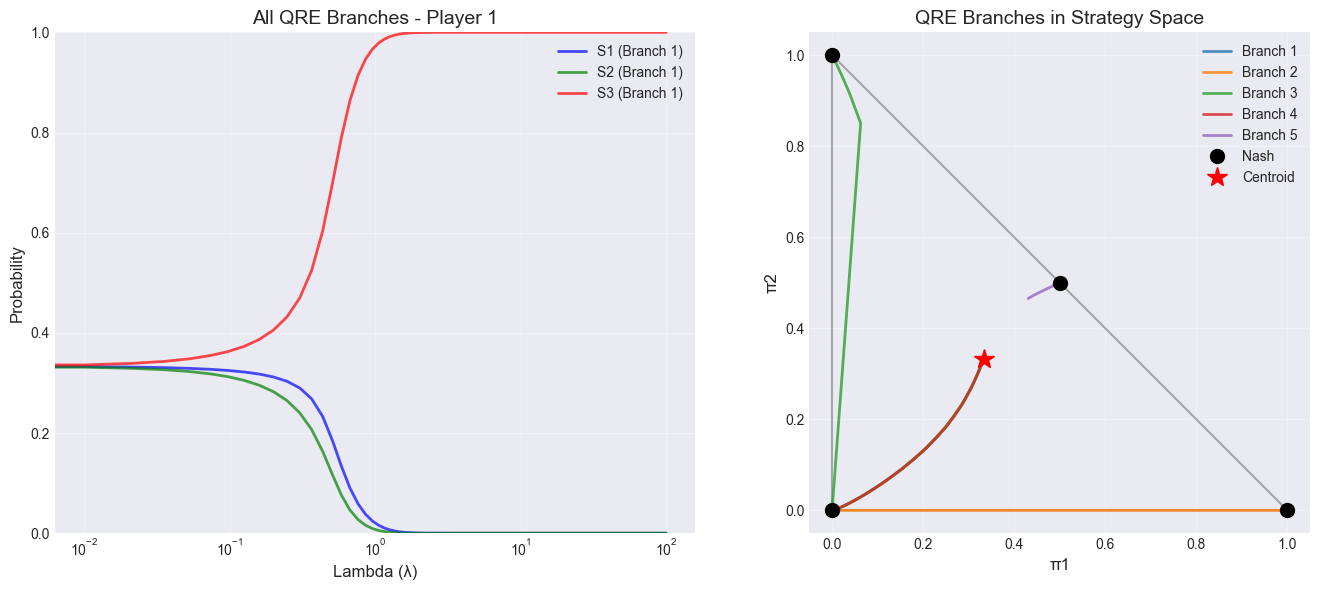

In [13]:
# Plot all branches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Player 1 strategies
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'cyan', 'magenta', 'yellow']
strategy_names = ['S1', 'S2', 'S3']

# Plot all branches from continuation method
# for branch_idx, branch in enumerate(branches):
branch_idx = 0
branch = branches[branch_idx]
lambdas = [p.lambda_val for p in branch]
for p in branch:
    print(p.pi1)
 
for strat_idx in range(3):
    probs = [p.pi1[strat_idx] for p in branch]
    label = f'{strategy_names[strat_idx]} (Branch {branch_idx+1})'
    ax1.plot(lambdas, probs, color=colors[strat_idx], alpha=0.7, linewidth=2, label=label)

ax1.set_xscale('log')
ax1.set_xlabel('Lambda (λ)', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('All QRE Branches - Player 1', fontsize=14)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Plot in (π1, π2) space
ax2.set_aspect('equal')

# Plot simplex boundaries
ax2.plot([0, 1], [0, 0], 'k-', alpha=0.3)
ax2.plot([0, 0], [0, 1], 'k-', alpha=0.3)
ax2.plot([0, 1], [1, 0], 'k-', alpha=0.3)

# Plot all branches
for branch_idx, branch in enumerate(branches):
    pi1_vals = [p.pi1[0] for p in branch]
    pi2_vals = [p.pi1[1] for p in branch]
    ax2.plot(pi1_vals, pi2_vals, linewidth=2, alpha=0.8, label=f'Branch {branch_idx+1}')

# Mark Nash equilibria
for i, nash in enumerate(nash_equilibria):
    ax2.plot(nash[0], nash[1], 'ko', markersize=10, label='Nash' if i == 0 else None)

# Mark centroid
ax2.plot(1/3, 1/3, 'r*', markersize=15, label='Centroid')

ax2.set_xlabel('π1', fontsize=12)
ax2.set_ylabel('π2', fontsize=12)
ax2.set_title('QRE Branches in Strategy Space', fontsize=14)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

## Find All QRE Solutions at a Specific Lambda

Now let's find ALL QRE solutions at λ = 1.0, not just the one on the principal branch.

In [15]:
# Find all QRE solutions at lambda = 1.0
target_lambda = 10.0
all_qre_at_lambda = qre_solver.find_qre_at_lambda(target_lambda, branches)

print(f"\nAll QRE solutions at λ = {target_lambda}:\n")
for i, qre in enumerate(all_qre_at_lambda):
    print(f"Solution {i+1}: [{qre.pi1[0]:.6f}, {qre.pi1[1]:.6f}, {qre.pi1[2]:.6f}]")
    
    # Verify it's a valid QRE
    residual = qre_solver.residual_full(target_lambda, qre.pi1)
    print(f"  Residual norm: {np.linalg.norm(residual):.2e}")
    print()


All QRE solutions at λ = 10.0:

Solution 1: [-0.000000, -0.000000, 1.000000]
  Residual norm: 4.02e-12

Solution 2: [0.999954, 0.000000, 0.000046]
  Residual norm: 4.22e-08

Solution 3: [0.000000, 1.000000, -0.000000]
  Residual norm: 2.56e-13

Solution 4: [0.497251, 0.498698, 0.004050]
  Residual norm: 1.05e-06

Solution 5: [0.455594, 0.479052, 0.065353]
  Residual norm: 9.69e-07



## Visualize QRE Solutions at Different Lambda Values

Let's see how the number of QRE solutions changes as lambda varies.

In [ ]:
# Test Game 1: Coordination game with multiple pure Nash equilibria
coord_game = np.array([
    [10, 0, 0],
    [0, 10, 0],
    [0, 0, 10]
])

# Test Game 2: Rock-Paper-Scissors variant
rps_game = np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])

# Test Game 3: Battle of Sexes variant
bos_game = np.array([
    [6, 1, 0],
    [0, 3, 1],
    [1, 0, 4]
])

test_games = [
    ("Coordination Game", coord_game),
    ("Rock-Paper-Scissors", rps_game),
    ("Battle of Sexes Variant", bos_game)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, game_matrix) in enumerate(test_games):
    ax = axes[idx]
    ax.set_aspect('equal')
    
    # Find Nash equilibria using pygambit
    nash_eq = find_nash_with_pygambit(game_matrix)
    
    # Solve for QRE branches
    qre_solver_test = QREContinuation(game_matrix)
    branches = qre_solver_test.find_all_branches(nash_eq, lambda_max=20.0)
    
    # Plot branches
    for branch in branches:
        pi1_vals = [p.pi1[0] for p in branch]
        pi2_vals = [p.pi1[1] for p in branch]
        ax.plot(pi1_vals, pi2_vals, linewidth=2, alpha=0.8)
    
    # Plot simplex
    ax.plot([0, 1], [0, 0], 'k-', alpha=0.3)
    ax.plot([0, 0], [0, 1], 'k-', alpha=0.3)
    ax.plot([0, 1], [1, 0], 'k-', alpha=0.3)
    
    # Mark Nash equilibria
    for nash in nash_eq:
        ax.plot(nash[0], nash[1], 'ko', markersize=8)
    
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('π1', fontsize=12)
    ax.set_ylabel('π2', fontsize=12)
    ax.set_title(f'{name}\n({len(branches)} branches, {len(nash_eq)} Nash)', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('QRE Branch Structures for Different Games', fontsize=16)
plt.tight_layout()
plt.show()

## Test with Different Games

Let's test the algorithm with different types of games to see various branch structures.

In [ ]:
# Test Game 1: Coordination game with multiple pure Nash equilibria
coord_game = np.array([
    [10, 0, 0],
    [0, 10, 0],
    [0, 0, 10]
])

# Test Game 2: Rock-Paper-Scissors variant
rps_game = np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])

# Test Game 3: Battle of Sexes variant
bos_game = np.array([
    [6, 1, 0],
    [0, 3, 1],
    [1, 0, 4]
])

test_games = [
    ("Coordination Game", coord_game),
    ("Rock-Paper-Scissors", rps_game),
    ("Battle of Sexes Variant", bos_game)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, game_matrix) in enumerate(test_games):
    ax = axes[idx]
    ax.set_aspect('equal')
    
    # Find Nash equilibria using pygambit
    nash_eq = find_nash_with_pygambit(game_matrix)
    
    # Solve for QRE branches
    qre_solver_test = QREContinuation(game_matrix)
    branches = qre_solver_test.find_all_branches(nash_eq, lambda_max=20.0)
    
    # Plot branches
    for branch in branches:
        pi1_vals = [p.pi1[0] for p in branch]
        pi2_vals = [p.pi1[1] for p in branch]
        ax.plot(pi1_vals, pi2_vals, linewidth=2, alpha=0.8)
    
    # Plot simplex
    ax.plot([0, 1], [0, 0], 'k-', alpha=0.3)
    ax.plot([0, 0], [0, 1], 'k-', alpha=0.3)
    ax.plot([0, 1], [1, 0], 'k-', alpha=0.3)
    
    # Mark Nash equilibria
    for nash in nash_eq:
        ax.plot(nash[0], nash[1], 'ko', markersize=8)
    
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('π1', fontsize=12)
    ax.set_ylabel('π2', fontsize=12)
    ax.set_title(f'{name}\n({len(branches)} branches, {len(nash_eq)} Nash)', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('QRE Branch Structures for Different Games', fontsize=16)
plt.tight_layout()
plt.show()

## Summary

This implementation successfully finds ALL QRE branches, not just the principal branch that pygambit computes. Key findings:

1. **Multiple Solutions**: For many games, there are multiple QRE solutions at a given λ value
2. **Branch Structure**: QRE branches can turn, merge, and connect different Nash equilibria
3. **Continuation Method**: The pseudo-arclength continuation method reliably traces all branches
4. **Limitations of pygambit**: Only follows the principal branch from the centroid

This is crucial for:
- Complete analysis of strategic behavior under bounded rationality
- Understanding all possible equilibrium predictions
- Structural estimation where data might be better explained by non-principal branches